In [14]:
from pprint import pprint

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from skimage.transform import resize

import matplotlib.pyplot as plt

from keras.layers import Flatten, Dense, Input, Rescaling
from keras.utils import to_categorical

import tensorflow as tf

from pathlib import Path

# Preprocessing data

In [2]:
# loading images
dog_directory = Path("images")

breeds = []
for breed in dog_directory.iterdir():
    # count number of images in each breed
    if breed.is_dir():
        breed_count = len(list(breed.glob("*.jpg")))
        breeds.append((breed.name.split("-", 1)[-1], breed_count))

breeds.sort(key=lambda x: x[1], reverse=True)
breeds = [breed[0] for breed in breeds[:10]] # only 10 breeds
# print(breeds)

['Maltese_dog', 'Afghan_hound', 'Scottish_deerhound', 'Pomeranian', 'Irish_wolfhound', 'Bernese_mountain_dog', 'Samoyed', 'Shih-Tzu', 'Great_Pyrenees', 'Leonberg']


In [3]:
# load images
X = []
y = []
width, height = 128, 128 # image resolution

for breed in dog_directory.iterdir():
    breed_name = breed.name.split("-", 1)[-1]
    for i, image_path in enumerate(breed.glob("*.jpg")):
        if breed_name not in breeds:
            continue
        image = plt.imread(image_path)
        image = resize(image, (width, height, 3))
        X.append(image)
        y.append(breeds.index(breed_name))
        if i >= 139:  # do 140 images each
            break
    print(f"Loaded {len(X)} images for {breed_name}")

X = np.array(X)
y = np.array(y)

print(f"{X=}, {y=}")

Loaded 0 images for silky_terrier
Loaded 140 images for Scottish_deerhound
Loaded 140 images for Chesapeake_Bay_retriever
Loaded 140 images for Ibizan_hound
Loaded 140 images for wire-haired_fox_terrier
Loaded 140 images for Saluki
Loaded 140 images for cocker_spaniel
Loaded 140 images for schipperke
Loaded 140 images for borzoi
Loaded 140 images for Pembroke
Loaded 140 images for komondor
Loaded 140 images for Staffordshire_bullterrier
Loaded 140 images for standard_poodle
Loaded 140 images for Eskimo_dog
Loaded 140 images for English_foxhound
Loaded 140 images for golden_retriever
Loaded 140 images for Sealyham_terrier
Loaded 140 images for Japanese_spaniel
Loaded 140 images for .DS_Store
Loaded 140 images for miniature_schnauzer
Loaded 140 images for malamute
Loaded 140 images for malinois
Loaded 140 images for Pekinese
Loaded 140 images for giant_schnauzer
Loaded 140 images for Mexican_hairless
Loaded 140 images for Doberman
Loaded 140 images for standard_schnauzer
Loaded 140 image

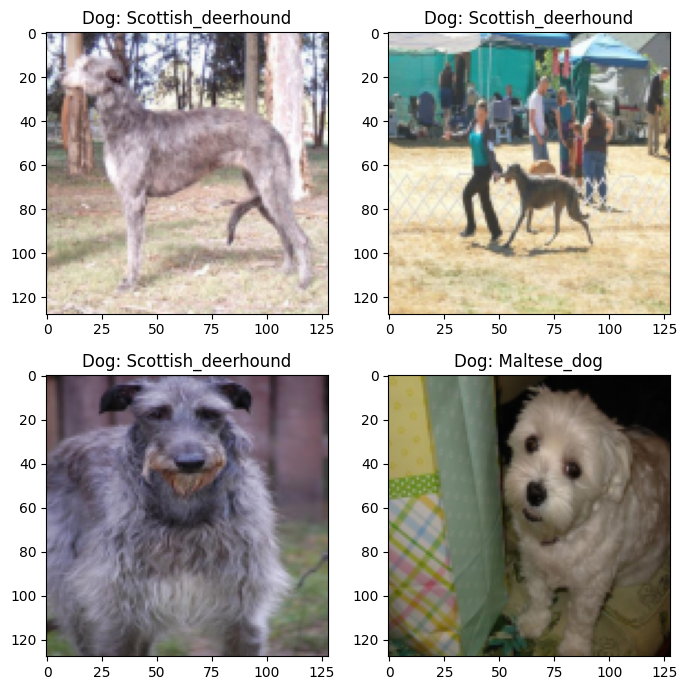

In [13]:
# # Show images
# f, axarr = plt.subplots(2,2)
# f.set_size_inches(7, 7)
# axarr[0,0].imshow(X[0].reshape(width, height, 3))
# axarr[0,0].set_title(f"Dog: {breeds[y[0]]}")
# axarr[0,1].imshow(X[50].reshape(width, height, 3))
# axarr[0,1].set_title(f"Dog: {breeds[y[50]]}")
# axarr[1,0].imshow(X[100].reshape(width, height, 3))
# axarr[1,0].set_title(f"Dog: {breeds[y[100]]}")
# axarr[1,1].imshow(X[150].reshape(width, height, 3))
# axarr[1,1].set_title(f"Dog: {breeds[y[150]]}")
# plt.tight_layout()

In [5]:
# label data
labels = to_categorical(y, num_classes=10)
labels = np.array(labels, dtype="int32")
print(labels)

[[0 0 1 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]]


# Split data

In [6]:
# Split data into training and test samples
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, labels,   
    test_size = 0.07, random_state=10, shuffle=True
)
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, 
    test_size = 0.07, random_state=10, shuffle=True
)

# Scale data to be in between 0 and 1
X_train = X_train/255
X_val = X_val/255
X_test = X_test/255

[[0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 1]
 [0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 1 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0]
 [0 0 1 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 1 0]
 [0 1 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 1]
 [0 0 1 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 1 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1]
 [0 1 0 0 0

In [7]:
# Check shapes
print('X_train:' + str(X_train.shape))
print('y_train:' + str(y_train.shape))
print('X_val: \t'  + str(X_val.shape))
print('y_val: \t'  + str(y_val.shape))
print('X_test: '  + str(X_test.shape))
print('y_test: '  + str(y_test.shape))

X_train:(1209, 128, 128, 3)
y_train:(1209, 10)
X_val: 	(92, 128, 128, 3)
y_val: 	(92, 10)
X_test: (99, 128, 128, 3)
y_test: (99, 10)


# Functions

In [15]:
# Train model
def train_model(activation="sigmoid", epoch=100):
    model = Sequential([
        Input(shape=(width, height, 3)),
        Flatten(),
        #  Dense(1024, activation="sigmoid"),
        #  Dense(512, activation="sigmoid"),
        Dense(256, activation=activation),
        Dense(128, activation=activation),
        Dense(120, activation=activation),
        Dense(10, activation="softmax"),
        ])
    model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics=["accuracy", tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])
    history = model.fit(X_train, y_train, epochs = epoch, validation_data=(X_val, y_val))
    model.evaluate(X_val, y_val)
    return history, model

def class_report(history, model):
    print(f"train_acc={np.mean(history.history["accuracy"])}")
    print(f"val_acc={np.mean(history.history["val_accuracy"])}")
    res = model.predict(X_test)
    y_test = np.array(y_test, dtype="int32")

    p, q = [], []

    for i in range(len(res)):
        p.append(np.argmax(res[i]))
        pred = breeds[np.argmax(res[i])]
        q.append(np.argmax(y_test[i]))

        actual = breeds[np.argmax(y_test[i])]
        # print(f"Predicted: {pred}, Actual: {actual}")

    # top_breeds = ["French_bulldog", "golden_retriever", 
    # "German_shepherd", "standard_poodle", "Samoyed", 
    # "French_bulldog", "beagle", "Rottweiler"]
    print(classification_report(p, q))

# Test

In [16]:
# Sigmoid (control)
history, model = train_model()
plt.plot(history.history["loss"], label="Training Error")
plt.plot(history.history["val_loss"], label="Validation Error")
plt.legend(loc="upper right")
plt.title("Error vs Epochs (Sigmoid Activation Function)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
class_report(history, model)


KeyboardInterrupt: 

In [17]:
# Hidden Layers
# 5 Layers
history, model = train_model()
plt.plot(history.history["loss"], label="Training Error")
plt.plot(history.history["val_loss"], label="Validation Error")
plt.legend(loc="upper right")
plt.title("Error vs Epochs (Five Hidden Layers)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
class_report(history, model)

# 3 Layers
history, model = train_model()
plt.plot(history.history["loss"], label="Training Error")
plt.plot(history.history["val_loss"], label="Validation Error")
plt.legend(loc="upper right")
plt.title("Error vs Epochs (Three Hidden Layers)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
class_report(history, model)

Epoch 1/100


KeyboardInterrupt: 

In [ ]:
# Activation Functions
# ReLU
history, model = train_model("leaky_relu")
plt.plot(history.history["loss"], label="Training Error")
plt.plot(history.history["val_loss"], label="Validation Error")
plt.legend(loc="upper right")
plt.title("Error vs Epochs (Leaky ReLU Activation Function)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
class_report(history, model)

# Tanh
history, model = train_model("tanh")
plt.plot(history.history["loss"], label="Training Error")
plt.plot(history.history["val_loss"], label="Validation Error")
plt.legend(loc="upper right")
plt.title("Error vs Epochs (Tanh Activation Function)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
class_report(history, model)

In [ ]:
# Iterations
# 400 Iterations
history, model = train_model("sigmoid", 200)
plt.plot(history.history["loss"], label="Training Error")
plt.plot(history.history["val_loss"], label="Validation Error")
plt.legend(loc="upper right")
plt.title("Error vs Epochs (400 Iterations)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
class_report(history, model)

# 200 Iterations
history, model = train_model("sigmoid", 100)
plt.plot(history.history["loss"], label="Training Error")
plt.plot(history.history["val_loss"], label="Validation Error")
plt.legend(loc="upper right")
plt.title("Error vs Epochs (200 Iterations)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
class_report(history, model)

In [ ]:
# # Normalized
# history, model = train_model("sigmoid", 100)
# plt.plot(history.history["loss"], label="Training Error")
# plt.plot(history.history["val_loss"], label="Validation Error")
# plt.legend(loc="upper right")
# plt.title("Error vs Epochs (Normalization)")
# plt.xlabel("Epochs")
# plt.ylabel("Loss")
# class_report(history, model)

# # Not Normalized
# history, model = train_model("sigmoid", 100)
# plt.plot(history.history["loss"], label="Training Error")
# plt.plot(history.history["val_loss"], label="Validation Error")
# plt.legend(loc="upper right")
# plt.title("Error vs Epochs (No Normalization)")
# plt.xlabel("Epochs")
# plt.ylabel("Loss")
# class_report(history, model)

Epoch 1/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 13s 235ms/step - accuracy: 0.0920 - loss: 40554.7656 - precision_66: 0.0000e+00 - recall_66: 0.0000e+00 - val_accuracy: 0.1087 - val_loss: 13240.0928 - val_precision_66: 0.0000e+00 - val_recall_66: 0.0000e+00
Epoch 2/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 8s 200ms/step - accuracy: 0.0843 - loss: 10518.8135 - precision_66: 0.0000e+00 - recall_66: 0.0000e+00 - val_accuracy: 0.1087 - val_loss: 4819.9775 - val_precision_66: 0.0000e+00 - val_recall_66: 0.0000e+00
Epoch 3/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 9s 245ms/step - accuracy: 0.1068 - loss: 3825.8494 - precision_66: 0.0000e+00 - recall_66: 0.0000e+00 - val_accuracy: 0.0543 - val_loss: 1702.7555 - val_precision_66: 0.0000e+00 - val_recall_66: 0.0000e+00
Epoch 4/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 7s 191ms/step - accuracy: 0.1107 - loss: 1340.3314 - precision_66: 0.0000e+00 - recall_66: 0.0000e+00 - val_accuracy: 0.0543 - val_loss: 580.2847 - val_precision_66: 0.0000e+00 - val_recall_66: 0.0000e+00
Epoch 5/100
38/38

Text(0, 0.5, 'Loss')

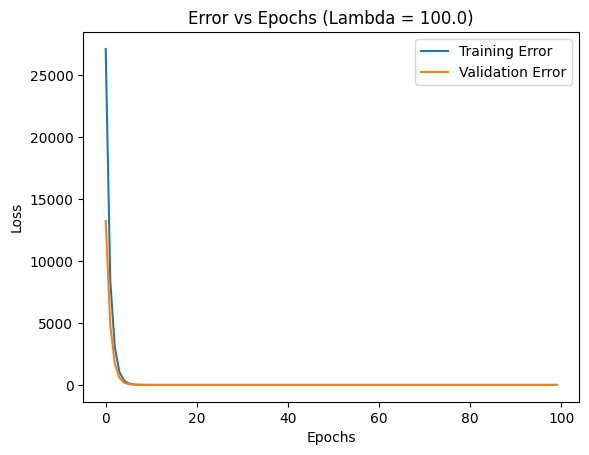

In [355]:
# Regularizers
def train_model_reg(l, activation="sigmoid", epoch=100):
    model = Sequential([
        Input(shape=(width, height, 3)),
        Flatten(),
        #  Dense(1024, activation="sigmoid"),
        #  Dense(512, activation="sigmoid"),
        Dense(256, activation=activation, kernel_regularizer=regularizers.l2(l)),
        Dense(128, activation=activation, kernel_regularizer=regularizers.l2(l)),
        Dense(120, activation=activation, kernel_regularizer=regularizers.l2(l)),
        Dense(10, activation="softmax", kernel_regularizer=regularizers.l2(l)),
        ])
    model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics=["accuracy", tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])
    history = model.fit(X_train, y_train, epochs = epoch, validation_data=(X_val, y_val))
    model.evaluate(X_val, y_val)
    return history, model

# Lambda = 0.0001
history, model train_model_reg(0.0001)
plt.plot(history.history["loss"], label="Training Error")
plt.plot(history.history["val_loss"], label="Validation Error")
plt.legend(loc="upper right")
plt.title("Error vs Epochs (Lambda = 0.0001)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
class_report(history, model)

# Lambda = 0.001
history, model = train_model_reg(0.001)
plt.plot(history.history["loss"], label="Training Error")
plt.plot(history.history["val_loss"], label="Validation Error")
plt.legend(loc="upper right")
plt.title("Error vs Epochs (Lambda = 0.001)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
class_report(history, model)

# Lambda = 0.01
history, model = train_model_reg(0.01)
plt.plot(history.history["loss"], label="Training Error")
plt.plot(history.history["val_loss"], label="Validation Error")
plt.legend(loc="upper right")
plt.title("Error vs Epochs (Lambda = 0.01)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
class_report(history, model)

# Lambda = 1.0
history, model = train_model_reg(1.0)
plt.plot(history.history["loss"], label="Training Error")
plt.plot(history.history["val_loss"], label="Validation Error")
plt.legend(loc="upper right")
plt.title("Error vs Epochs (Lambda = 1.0)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
class_report(history, model)

# Lambda = 10.0
history, model = train_model_reg(10.0)
plt.plot(history.history["loss"], label="Training Error")
plt.plot(history.history["val_loss"], label="Validation Error")
plt.legend(loc="upper right")
plt.title("Error vs Epochs (Lambda = 10.0)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
class_report(history, model)

# Lambda = 100.0
history, model = train_model_reg(100.0)
plt.plot(history.history["loss"], label="Training Error")
plt.plot(history.history["val_loss"], label="Validation Error")
plt.legend(loc="upper right")
plt.title("Error vs Epochs (Lambda = 100.0)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
class_report(history, model)